 ##Data Management Notebook for Open Acess

Importing libraries:

In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


The number of immigrants currently active and inactive

In [2]:
df_act = pd.read_csv("https://raw.githubusercontent.com/openaccesstoimmigrants/openaccesstoimmigrants/main/_datasets/ISTAT_Active_Foreigners%5B2018-2022%5D.csv", sep=",")

df2 = df_act[["Gender", "Age class", "Highest level of education attained", "TIME", "Value"]]

act_females = df2[df2["Gender"] == 'females']

act_females['TIME'] = act_females['TIME'].astype('str')
mask = (act_females['TIME'].str.len() == 4)
act_females = act_females.loc[mask]

act_females_final = act_females[act_females["Highest level of education attained"] != 'total']

act_females_final.rename(columns = {'Highest level of education attained':'Education'}, inplace = True)

act_females_final

C:\Users\User\AppData\Local\Temp\ipykernel_13940\4292465995.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females['TIME'] = act_females['TIME'].astype('str')
C:\Users\User\AppData\Local\Temp\ipykernel_13940\4292465995.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  act_females_final.rename(columns = {'Highest level of education attained':'Education'}, inplace = True)


,Gender,Age class,Education,TIME,Value
75,females,15-64 years,upper and post secondary,2018,67.333505
80,females,15-64 years,upper and post secondary,2019,65.892842
85,females,15-64 years,upper and post secondary,2020,59.762553
90,females,15-64 years,upper and post secondary,2021,62.995636
91,females,15-64 years,upper and post secondary,2022,63.102924
100,females,15-64 years,"tertiary (university, doctoral and specializat...",2018,71.341341
105,females,15-64 years,"tertiary (university, doctoral and specializat...",2019,69.690972
110,females,15-64 years,"tertiary (university, doctoral and specializat...",2020,61.267579
115,females,15-64 years,"tertiary (university, doctoral and specializat...",2021,65.488050
116,females,15-64 years,"tertiary (university, doctoral and specializat...",2022,67.064311


<AxesSubplot: xlabel='TIME', ylabel='Value'>

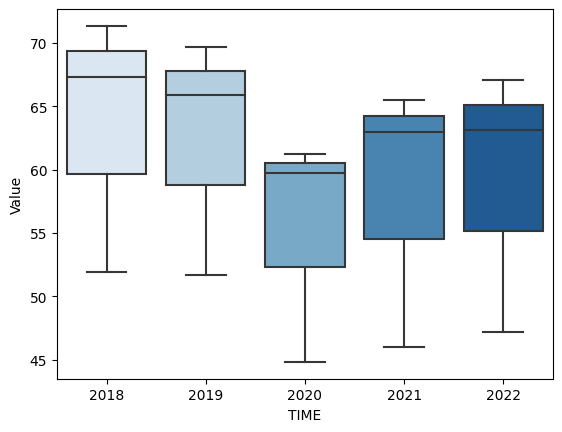

In [4]:
import seaborn as sns
sns.boxplot(data=act_females_final, x='TIME', y='Value', palette='Blues')